In [40]:
# Datos
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_excel("quantfury/fer.xls", index_col=0) 

c:\Users\lufer\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [42]:
df.dtypes

Action                object
Quantity              object
Price                 object
Value                 object
Date                  object
Total Position PnL    object
dtype: object

In [43]:
df.head()

,Action,Quantity,Price,Value,Date,Total Position PnL
Name,,,,,,
BTC/USDT,Bought,0.00026587 BTC,"₮37,612.9100",₮10.00,24.11.2023 6:45 PM UTC,NaN
BTC/USDT,Bought,0.00026569 BTC,"₮37,637.8700",₮10.00,26.11.2023 12:17 PM UTC,NaN
BTC/USDT,Bought,0.00026966 BTC,"₮37,084.2700",₮10.00,27.11.2023 11:30 AM UTC,NaN
BTC/USDT,Bought,0.00077740 BTC,"₮38,590.1800",₮30.00,01.12.2023 11:45 AM UTC,NaN
BTC/USDT,Sold,0.00157861 BTC,"₮43,800.0000",₮60.00,06.12.2023 1:47 AM UTC,₮9.14


# Limpieza de datos

In [44]:
def clean_column(df, column, symbols):
    df[column] = df[column].str.replace(r'[a-zA-Z]', '', regex=True)
    df[column] = df[column].str.replace(' ', '', regex=True)
    df[column] = df[column].str.replace(',', '', regex=True)
    for symbol in symbols:
        df[column] = df[column].str.replace(symbol, '')
    df[column] = df[column].astype(float)
    return df

In [45]:
def clean(df):
    # Lista de simbolos a eliminar
    symbols = ['₮', '$', '€', ',']

    # Limpiar columnas
    df = clean_column(df, 'Quantity', symbols)
    df = clean_column(df, 'Price', symbols)
    df = clean_column(df, 'Value', symbols)
    df = clean_column(df, 'Total Position PnL', symbols)

    # Columna "Date": Convertir a formato fecha.
    df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y %I:%M %p %Z')

    # Eliminamos todas las filas con mas de 3 valores nulos.
    df.dropna(thresh=3, inplace=True)
    return df

# Visualización de datos Franz

In [46]:
def plot_pnl_by_month(df, year):
    # Filtramos por el año especificado
    df = df[df['Date'].dt.year == year]

    # Agrupamos por mes y sumamos la columna "Total Position PnL"
    pnl_by_month = df.groupby(df['Date'].dt.strftime('%B'))['Total Position PnL'].sum()

    # Ordenamos los meses
    pnl_by_month = pnl_by_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

    # Convertimos a dataframe
    pnl_by_month_df = pnl_by_month.to_frame()

    # Configuramos el estilo del gráfico
    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 6))

    # Agregamos título con fecha
    plt.title('Total Position PnL by month in ' + str(year))

    # Creamos el gráfico de barras
    sns.barplot(x=pnl_by_month_df.index, y='Total Position PnL', data=pnl_by_month_df)
    plt.xticks(rotation=45)

    # Agregamos el valor de cada barra
    for index, row in pnl_by_month_df.iterrows():
        plt.text(index, row['Total Position PnL'], round(row['Total Position PnL'], 2), color='black', ha="center")

    # Agregamos etiquetas
    plt.xlabel('Month')
    plt.ylabel('Total Position PnL')

    # La suma de todas las barras en un legend
    total_pnl = pnl_by_month_df['Total Position PnL'].sum()
    plt.legend(['Total Position PnL' + ' = ' + str(round(total_pnl, 2))])

    plt.grid(True)
    plt.show()

    return pnl_by_month_df

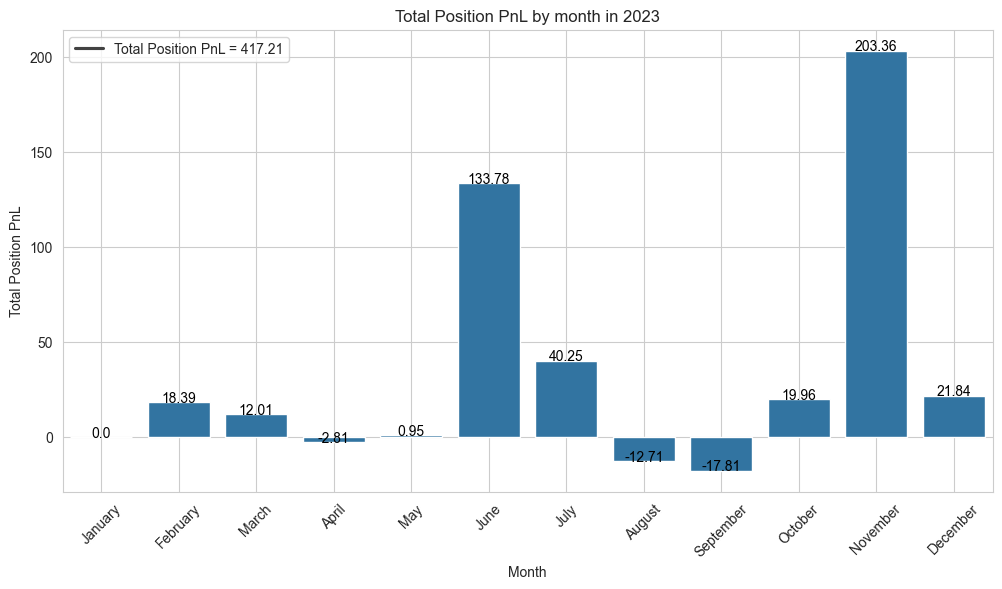

,Total Position PnL
Date,
January,0.00
February,18.39
March,12.01
April,-2.81
May,0.95
June,133.78
July,40.25
August,-12.71
September,-17.81


In [47]:
data_franz = clean(df)
plot_pnl_by_month(data_franz, 2023)

In [48]:
# Reseteamos el indice
data_franz.reset_index(inplace=True)

In [22]:
data_franz.head(10)

,Name,Action,Quantity,Price,Value,Date,Total Position PnL
0,GM,Bought,1.000000,29.66,29.66,2023-10-19 15:34:00+00:00,NaN
1,GM,Sold,1.000000,31.71,29.66,2023-11-29 14:30:00+00:00,2.05
2,INTC,Bought,1.000000,34.60,34.60,2023-09-21 19:13:00+00:00,NaN
3,INTC,Bought,1.000000,32.48,32.48,2023-10-26 14:25:00+00:00,NaN
4,INTC,Sold,1.000000,38.01,33.54,2023-11-03 13:52:00+00:00,NaN
5,INTC,Sold,1.000000,39.12,33.54,2023-11-14 15:49:00+00:00,10.05
6,SOL/USDT,Bought,0.483793,20.67,10.00,2023-04-10 19:30:00+00:00,NaN
7,SOL/USDT,Bought,0.455581,21.95,10.00,2023-05-06 21:00:00+00:00,NaN
8,SOL/USDT,Sold,0.469687,22.39,10.00,2023-05-07 16:35:00+00:00,NaN
9,SOL/USDT,Bought,0.471254,21.22,10.00,2023-05-08 11:47:00+00:00,NaN


# Ranking por año 2023 de las acciones y criptomonedas con mayor ganancia obtenida y perdida

In [51]:
# filtramos por el año 2023
data_franz = data_franz[data_franz['Date'].dt.year == 2023]

a = data_franz.groupby(data_franz['Name'])['Total Position PnL'].sum()

In [52]:
a.head(10)

# convertimos a dataframe
a_df = a.to_frame()
a_df.reset_index(inplace=True)


In [53]:
# Filtramos todos los nombre que tenga una / en la columna name
acciones = a_df[~a_df['Name'].str.contains('/')]
cripto = a_df[a_df['Name'].str.contains('/')]
